# Descriptive Statistics

Descriptive statistics is the branch of statistics that focuses on summarizing, organizing, and presenting data in an informative way. It helps to simplify large amounts of data into meaningful representations and provides an overview of the data’s characteristics without drawing conclusions beyond the data analyzed.

#### Let's go through the fundamental concepts of descriptive stats

* Measure of Central Tendency
* Measure of Dispersion (Spread)
* Measure of Position
* Data Visualisation 

In [1]:
import numpy as np
import statistics
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = sns.load_dataset('iris')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
sepal_length = np.array(df['sepal_length'])

## Measure of Central Tendency

Measures of central tendency summarize a dataset by identifying a central point around which the data is distributed. They help describe the “typical” value in the dataset and include the mean, median, and mode.

### Mean

The mean is the sum of all data points divided by the total number of data points.

Formula:
$$
\text{Mean} = \frac{\sum x_i}{n}
$$
where:

	• x_i  represents each data point
	• n  is the total number of data points

In [5]:
def mean(list_num):
    total_sum = 0
    for i in list_num:
        total_sum += i
    return total_sum / len(list_num)

In [6]:
mean_ = mean(sepal_length)
print(mean_)

5.843333333333335


In [7]:
np.mean(sepal_length)

5.843333333333334

### Median

The median is the middle value of a dataset when it is arranged in ascending or descending order. If there is an even number of data points, the median is the average of the two middle values.

Steps to Find:

	1. Arrange the data in ascending order.
	2. Identify the middle value:
    	• Odd n : Middle value.
    	• Even n : Average of the two middle values.

In [8]:
def median(list_num):
    list_num = sorted(list_num)
    n = len(list_num)
    if n % 2 == 1:
        return list_num[n//2]
    else:
        return (list_num[n//2] + list_num[n//2 - 1])/2

In [9]:
median_ = median(sepal_length)
print(median_)

5.8


In [10]:
np.median(sepal_length)

5.8

### Mode

The mode is the value or values that appear most frequently in the dataset.

In [11]:
def mode(list_num):
    frequency = {}
    for num in list_num:
        if num in frequency:
            frequency[num] += 1
        else:
            frequency[num] = 1
    max_frequency = max(frequency.values())
    modes = [key for key, value in frequency.items() if value == max_frequency]
    if len(modes) == len(frequency):
        return None
    return modes if len(modes) > 1 else modes[0]

In [12]:
mode_ = mode(sepal_length)
print(mode_)

5.0


In [13]:
print(statistics.mode(sepal_length))

5.0


## Measures of Dispersion (Spread)

Measures of dispersion, also known as measures of variability or spread, describe the extent to which data points in a dataset differ from one another and from the central value (mean, median, or mode). They help us understand the distribution’s spread and variability.

### Range

The simplest measure of dispersion, it is the difference between the maximum and minimum values in a dataset.

Formula:
$$
\text{Range} = \text{Max} - \text{Min}
$$

In [14]:
def range(list_num):
    return max(list_num) - min(list_num)

In [15]:
range_ = range(sepal_length)
print(range_)

3.6000000000000005


### Variance

The average of the squared differences of each data point from the mean. It quantifies how far data points are from the mean in a squared sense.

Formula:
$$
\text{Variance} = \frac{\sum (x_i - \text{Mean})^2}{n}
$$
For a sample:
$$
\text{Sample Variance} = \frac{\sum (x_i - \bar{x})^2}{n-1}
$$

In [16]:
def sample_variance(list_num):
    mean = sum(list_num) / len(list_num)
    squared_differences = [(x - mean) ** 2 for x in list_num]
    return sum(squared_differences) / (len(list_num))

In [17]:
sample_variance_ = sample_variance(sepal_length)
print(sample_variance_)

0.6811222222222222


In [18]:
np.var(sepal_length)

0.6811222222222223

### Standard Deviation (SD)

The square root of the variance, providing a measure of spread in the same units as the data.

$$
\text{Standard Deviation} = \sqrt{\text{Variance}}
$$

In [19]:
def standard_deviation(list_num):
    mean = sum(list_num) / len(list_num)
    squared_differences = [(x - mean) ** 2 for x in list_num]
    sample_variance = sum(squared_differences) / (len(list_num))
    return sample_variance**0.5

In [20]:
standard_deviation_ = standard_deviation(sepal_length)
print(standard_deviation_)

0.8253012917851409


In [21]:
print(np.std(sepal_length))

0.8253012917851409


## Measures of Position

Measures of position describe where a particular value lies relative to the rest of the data in a dataset. These metrics help in understanding how individual data points compare to others and the overall spread of the dataset.

### Percentiles

Percentiles divide the data into 100 equal parts. A specific percentile indicates the value below which a given percentage of the data falls.

Formula to find rank:
$$
k = \frac{P}{100} \times (n + 1)
$$
where:

	• P is the desired percentile (e.g., 25, 50, 90, etc.).
	• n is the number of data points in the dataset.

In [22]:
def percentile(list_num, percentile):
    list_num = sorted(list_num)
    n = len(list_num)
    k = (percentile / 100) * (n + 1)

    if k.is_integer():
        return list_num[int(k) - 1]
    
    lower_index = int(k) - 1
    upper_index = lower_index + 1
    lower_value = list_num[lower_index]
    upper_value = list_num[upper_index]
    return lower_value + (k - lower_index - 1) * (upper_value - lower_value)

In [23]:
percentile_ = percentile(sepal_length, 75)
print(percentile_)

6.4


In [24]:
np.percentile(sepal_length, 75)

6.4

### Interquartile Range (IQR)

The range of the middle 50% of the dataset, calculated as the difference between the third quartile ( Q3 ) and the first quartile ( Q1 ).

$$
\text{IQR} = Q3 - Q1
$$

In [25]:
def iqr(list_num):
    data = np.array(list_num)
    data.sort()
    q1 = np.percentile(list_num, 25)
    q3 = np.percentile(list_num, 75)
    return q3 - q1

In [26]:
iqr_ = iqr(sepal_length)
print(iqr_)

1.3000000000000007


In [27]:
print(np.percentile(sepal_length, 75) - np.percentile(sepal_length, 25))

1.3000000000000007


### Z-Scores (Standard Scores)

A Z-score measures how many standard deviations a data point is from the mean.

Formula:
$$
Z = \frac{x - \text{Mean}}{\text{Standard Deviation}}
$$

In [28]:
def z_scores(list_num):
    mean = sum(list_num) / len(list_num)
    variance = sum((x - mean) ** 2 for x in list_num) / len(list_num)
    standard_deviation = variance ** 0.5
    
    return [(x - mean) / standard_deviation for x in list_num]

In [29]:
z_scores_ = z_scores(sepal_length)
print(np.array(z_scores_))

[-0.90068117 -1.14301691 -1.38535265 -1.50652052 -1.02184904 -0.53717756
 -1.50652052 -1.02184904 -1.74885626 -1.14301691 -0.53717756 -1.26418478
 -1.26418478 -1.87002413 -0.05250608 -0.17367395 -0.53717756 -0.90068117
 -0.17367395 -0.90068117 -0.53717756 -0.90068117 -1.50652052 -0.90068117
 -1.26418478 -1.02184904 -1.02184904 -0.7795133  -0.7795133  -1.38535265
 -1.26418478 -0.53717756 -0.7795133  -0.41600969 -1.14301691 -1.02184904
 -0.41600969 -1.14301691 -1.74885626 -0.90068117 -1.02184904 -1.62768839
 -1.74885626 -1.02184904 -0.90068117 -1.26418478 -0.90068117 -1.50652052
 -0.65834543 -1.02184904  1.40150837  0.67450115  1.2803405  -0.41600969
  0.79566902 -0.17367395  0.55333328 -1.14301691  0.91683689 -0.7795133
 -1.02184904  0.06866179  0.18982966  0.31099753 -0.29484182  1.03800476
 -0.29484182 -0.05250608  0.4321654  -0.29484182  0.06866179  0.31099753
  0.55333328  0.31099753  0.67450115  0.91683689  1.15917263  1.03800476
  0.18982966 -0.17367395 -0.41600969 -0.41600969 -0.

In [30]:
print(stats.zscore(sepal_length))

[-0.90068117 -1.14301691 -1.38535265 -1.50652052 -1.02184904 -0.53717756
 -1.50652052 -1.02184904 -1.74885626 -1.14301691 -0.53717756 -1.26418478
 -1.26418478 -1.87002413 -0.05250608 -0.17367395 -0.53717756 -0.90068117
 -0.17367395 -0.90068117 -0.53717756 -0.90068117 -1.50652052 -0.90068117
 -1.26418478 -1.02184904 -1.02184904 -0.7795133  -0.7795133  -1.38535265
 -1.26418478 -0.53717756 -0.7795133  -0.41600969 -1.14301691 -1.02184904
 -0.41600969 -1.14301691 -1.74885626 -0.90068117 -1.02184904 -1.62768839
 -1.74885626 -1.02184904 -0.90068117 -1.26418478 -0.90068117 -1.50652052
 -0.65834543 -1.02184904  1.40150837  0.67450115  1.2803405  -0.41600969
  0.79566902 -0.17367395  0.55333328 -1.14301691  0.91683689 -0.7795133
 -1.02184904  0.06866179  0.18982966  0.31099753 -0.29484182  1.03800476
 -0.29484182 -0.05250608  0.4321654  -0.29484182  0.06866179  0.31099753
  0.55333328  0.31099753  0.67450115  0.91683689  1.15917263  1.03800476
  0.18982966 -0.17367395 -0.41600969 -0.41600969 -0.

## Data Visualization

Data visualization is the graphical representation of data and information. It uses visual elements like charts, graphs, and maps to make complex data more accessible, understandable, and usable.

### Histogram

Represents the frequency distribution of numerical data by grouping data into bins (ranges).

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


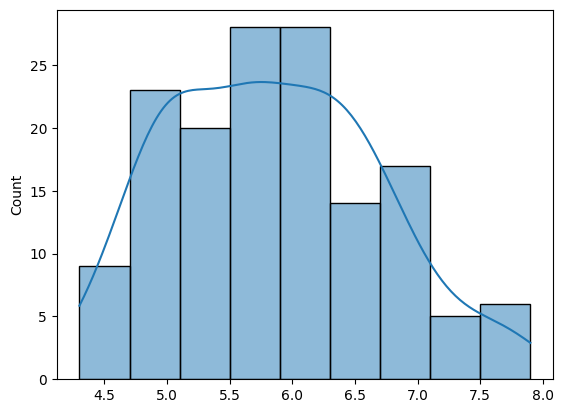

In [31]:
sns.histplot(sepal_length, kde=True)
plt.show()

### Boxplot

Displays the distribution of numerical data by showing the median, quartiles, and potential outliers.

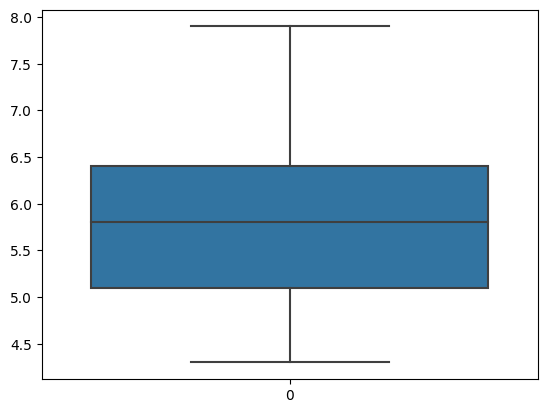

In [32]:
sns.boxplot(sepal_length)
plt.show()

### Barchart

Displays data with rectangular bars, where the length of the bar represents the value.

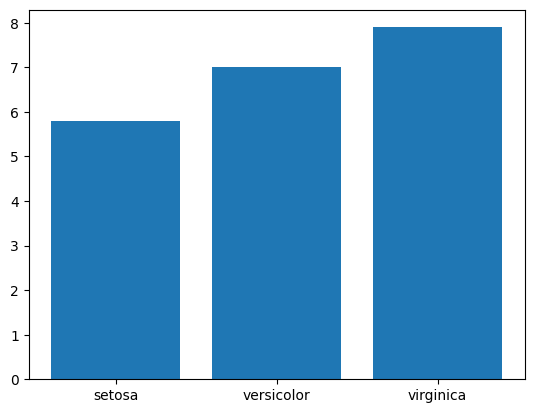

In [33]:
plt.bar(df['species'], df['sepal_length'])
plt.show()

### Scatter

Displays relationships between two continuous variables. It’s useful for visualizing correlations, clusters, or outliers.

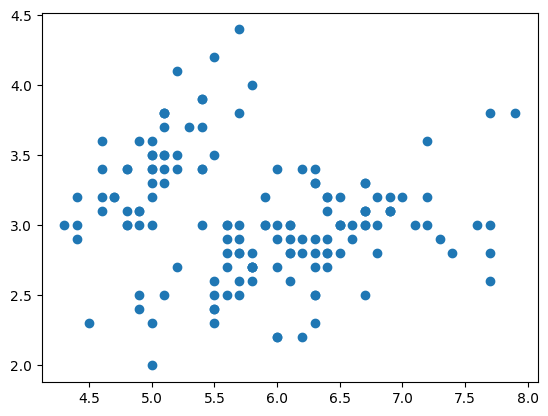

In [34]:
plt.scatter(df['sepal_length'], df['sepal_width'])
plt.show()